Evaluation:Root Mean Squared Logarithmic Error ***RMSLE***

\\( \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 } \\)



# 1、数据导入

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_train[:3]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


# 2、数据探索

In [3]:
print(data_train.info())
print('----------------------------------')
print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB
None
----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity  

----无缺失数据，并且可以发现测试数据少了三列，分别是casual、registered、count----

In [4]:
data_all = pd.concat([data_train.ix[:,:9], data_test])
data_all.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.028770,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540
std,1.106918,0.167165,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900


In [5]:
data_train.ix[:,-3:].describe()

,casual,registered,count
count,10886.000000,10886.000000,10886.000000
mean,36.021955,155.552177,191.574132
std,49.960477,151.039033,181.144454
min,0.000000,0.000000,1.000000
25%,4.000000,36.000000,42.000000
50%,17.000000,118.000000,145.000000
75%,49.000000,222.000000,284.000000
max,367.000000,886.000000,977.000000


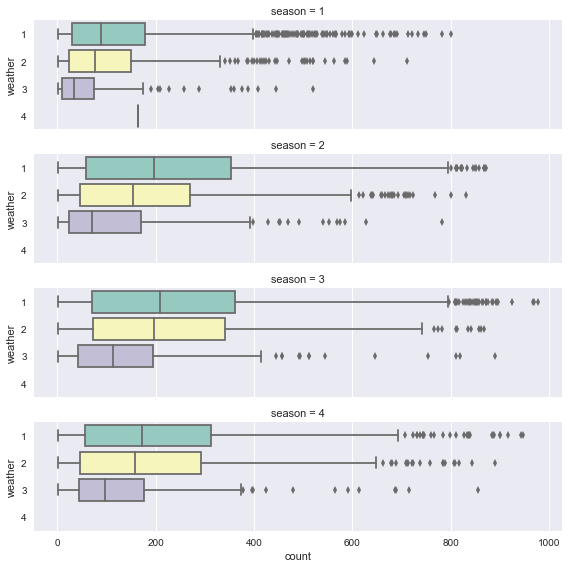

In [6]:
sns.factorplot(x='count', y='weather',row='season', data=data_train, orient='h',size=2,aspect=4, palette="Set3", kind='box')

----四季来看二三季度骑车人数都挺多，其次第四季度，第一季度骑车人数明显减少----

----天气来看，天气对骑车影响非常大，1-4汽车人数递减，且天气为4时，几乎无人骑车----

In [7]:
data_train['clock'] = data_train.datetime.map(lambda x: x[-8:-6])

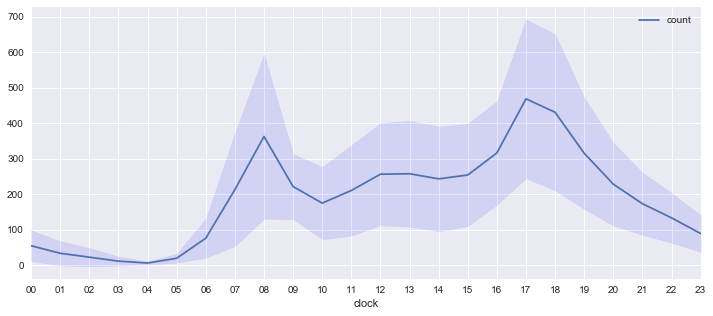

In [8]:
clock_count_mean = data_train.groupby('clock').agg({'count': np.mean})
clock_count_std = data_train.groupby('clock').agg({'count': np.std})
fig, ax = plt.subplots(figsize =(12, 5))
clock_count_mean.plot(xticks=np.arange(24), ax=ax)
plt.fill_between(np.arange(24), clock_count_mean['count'] - clock_count_std['count'],
                 clock_count_mean['count'] + clock_count_std['count'], alpha=0.1,color="b")

----从时间点上来看，存在两个高峰期分别是早上八点和傍晚五六点钟----

In [9]:
data_train['month'] = data_train.datetime.map(lambda x: x[5:7])

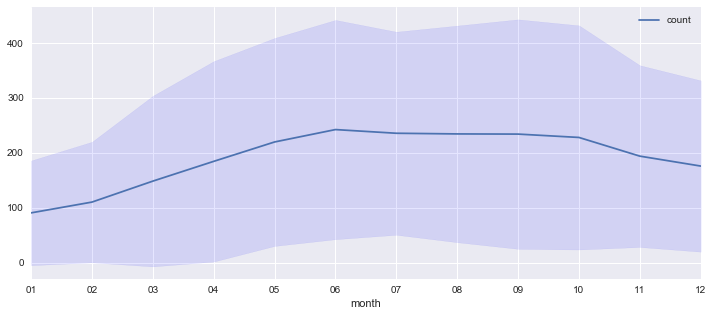

In [10]:
month_count_mean = data_train.groupby('month').agg({'count': np.mean})
month_count_std = data_train.groupby('month').agg({'count': np.std})
fig, ax = plt.subplots(figsize =(12, 5))
month_count_mean.plot(xticks=np.arange(12), ax=ax)
plt.fill_between(np.arange(12), month_count_mean['count'] - month_count_std['count'],
                 month_count_mean['count'] + month_count_std['count'], alpha=0.1,color="b")

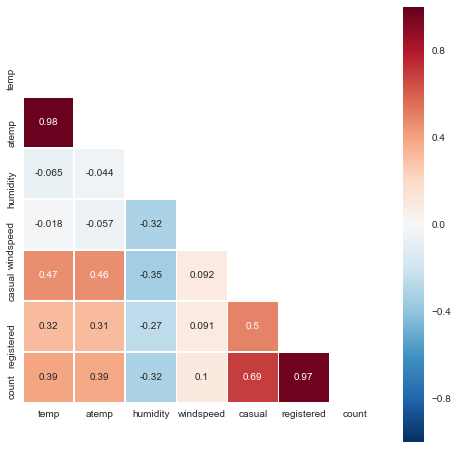

In [38]:
corr = data_train[["temp","atemp","humidity","windspeed", "casual","registered","count"]].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(corr, mask=mask, vmax=1,linewidths=.5, square=True, ax=ax,annot=True)

----根据相关系数可以看到，count跟windspeed几乎没有相关性----

# 3、数据处理

In [14]:
data_all[:3]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0


In [16]:
data_all['clock'] = data_all.datetime.map(lambda x: x[-8:-6])
data_all['month'] = data_all.datetime.map(lambda x: x[5:7])

X_raw = data_all.drop(['datetime', 'season', 'temp'], axis=1)

X = pd.get_dummies(X_raw)

encoded = list(X.columns)
print("%d total features after one-hot encoding." % (len(encoded)))

print(encoded)

42 total features after one-hot encoding.
['holiday', 'workingday', 'weather', 'atemp', 'humidity', 'windspeed', 'clock_00', 'clock_01', 'clock_02', 'clock_03', 'clock_04', 'clock_05', 'clock_06', 'clock_07', 'clock_08', 'clock_09', 'clock_10', 'clock_11', 'clock_12', 'clock_13', 'clock_14', 'clock_15', 'clock_16', 'clock_17', 'clock_18', 'clock_19', 'clock_20', 'clock_21', 'clock_22', 'clock_23', 'month_01', 'month_02', 'month_03', 'month_04', 'month_05', 'month_06', 'month_07', 'month_08', 'month_09', 'month_10', 'month_11', 'month_12']


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical = [ 'weather', 'atemp', 'humidity', 'windspeed']
X[numerical] = scaler.fit_transform(X[numerical])

In [18]:
X.head()

,holiday,workingday,weather,atemp,humidity,windspeed,clock_00,clock_01,clock_02,clock_03,...,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12
0,0,0,0.0,0.2879,0.81,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0.0,0.2727,0.80,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0.0,0.2727,0.80,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0.0,0.2879,0.75,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0.0,0.2879,0.75,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
y_train = data_train['count']
X_train = X[:len(y_train)]
X_test = X[len(y_train):]
print(X_train.shape, y_train.shape)
print(X_test.shape)

(10886, 42) (10886,)
(6493, 42)


# 4、构建模型

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

linear_reg = LinearRegression()

def rmsle(y_true, y_pred):
    y_true = np.array(y_true); y_pred = np.array(y_pred)
    n = len(y_true)
    return np.sqrt( np.sum( np.square( np.log(y_pred + 1) - np.log(y_true + 1) ) ) / n )

scorer = make_scorer(rmsle)

In [21]:
cross_val_score(linear_reg, X_train, y_train, scoring=scorer, cv =5)

F:\Anaconda\envs\py3\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: invalid value encountered in log
F:\Anaconda\envs\py3\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: invalid value encountered in log
F:\Anaconda\envs\py3\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: invalid value encountered in log
F:\Anaconda\envs\py3\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: invalid value encountered in log
F:\Anaconda\envs\py3\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: invalid value encountered in log


array([ nan,  nan,  nan,  nan,  nan])

In [30]:
rmsle([1,2,3], pd.Series([2,2,4]))


0.26720466462138648